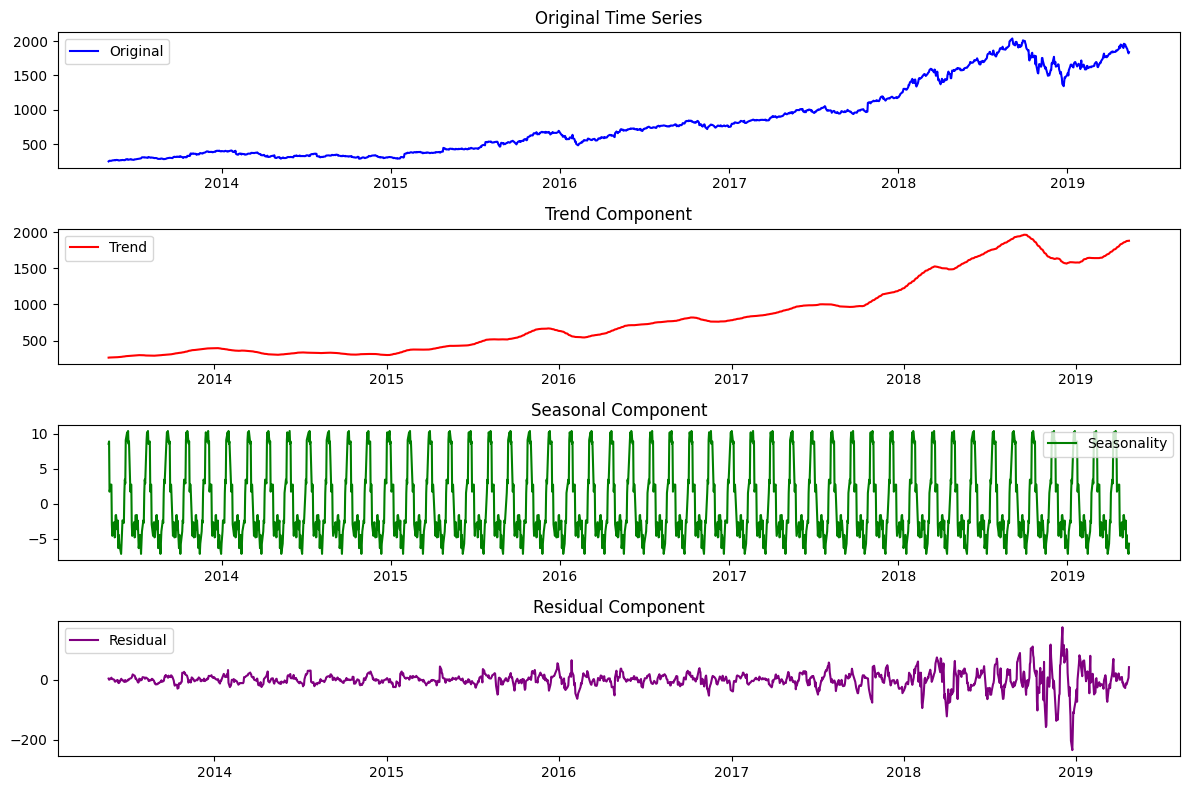

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_time_series(file_path, column_name, period=30, model='additive'):
    # Load the dataset
    df = pd.read_csv("/content/portfolio_data (1).csv")

    # Convert Date column to datetime format and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Perform seasonal decomposition
    result = seasonal_decompose(df[column_name], model=model, period=period)

    # Extract components
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid

    # Plot the original series, trend, and seasonal components
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(df[column_name], label='Original', color='blue')
    plt.title('Original Time Series')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(trend, label='Trend', color='red')
    plt.title('Trend Component')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(seasonal, label='Seasonality', color='green')
    plt.title('Seasonal Component')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(residual, label='Residual', color='purple')
    plt.title('Residual Component')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
decompose_time_series('portfolio_data.csv', 'AMZN', period=30, model='additive')
